# Assessing Risk of Portfolio

In this project we will be using Python to create a portfolio of assets and analzing its risk. The risk of a portfolio of assets depends on the weights assigned to each asset in the portfolio as well as the relationships of each asset with each other (covariance). 

One of the most important things to assess riskiness is by looking at its volatility (standard deviation) of the returns of each asset, which can be calculated by first finding the variance of the asset and taking the square root of it. 

To start with, we will have to import the required libraries. The 4 most important imports in this project are:

- Pandas (for dataframes and data analysis) 
- Quandl (Financial and economic dataset API)
- Matplotlib (Graphing purposes) 
- Numpy (calculations purposes) 

In [17]:
import pandas_datareader.data as web
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

We will first begin by listing the assets that we want to put into our portfolio. In this project we will be using five assets: 

- Coca-Cola 
- Pepsi 
- General Electric 
- Oracle 
- Walmart 

We will place the ticker symbols of these assets inside a Python list.

In [2]:
assets = ['KO', 'PEP', 'GE', 'ORCL', 'WMT']

Next we will create an empty dataframe, and populate it with stock data of our selected assets. In this project we will be pulling data from the Quandl API, and since we are only interested in the percentage returns of each asset inside the portfolio for our analysis, we will only be pulling the "Adjusted Close" prices of each asset. 

The data that we will be using is a two-year data from 2016 to 2018.

In [3]:
# Create empty dataframe 
df = pd.DataFrame()

# Use a for-loop to iterate through each ticker symbol and pull out data 
for stock in assets: 
    # We only want the Adjusted Close prices
    df[stock] = web.DataReader(stock, data_source = 'quandl', start = '2016-01-01', end = '2018-01-01')['AdjClose']
    
# Let's check the data by printing the first 5 rows
df.head()

,KO,PEP,GE,ORCL,WMT
Date,,,,,
2017-12-29,45.88,119.92,17.45,47.28,98.75
2017-12-28,45.72,119.35,17.36,47.52,99.40
2017-12-27,45.93,119.30,17.38,47.38,99.26
2017-12-26,45.81,118.89,17.43,47.43,99.16
2017-12-22,45.59,118.60,17.50,47.36,98.21


Now we will be converting these prices into percentage daily returns, since that is what we will be using for our analysis.

In [4]:
daily_returns = df.pct_change()

# Let's check the data 
daily_returns.head()

,KO,PEP,GE,ORCL,WMT
Date,,,,,
2017-12-29,NaN,NaN,NaN,NaN,NaN
2017-12-28,-0.003487,-0.004753,-0.005158,0.005076,0.006582
2017-12-27,0.004593,-0.000419,0.001152,-0.002946,-0.001408
2017-12-26,-0.002613,-0.003437,0.002877,0.001055,-0.001007
2017-12-22,-0.004802,-0.002439,0.004016,-0.001476,-0.009580


Notice that the first row of our dataframe is filled with NaN. This is because calculating the daily percentage requires us to use at least 2 periods (days) of data, but there is no row above the first one for us to compute the percentage returns.

We will have to remove the first row so that it will not interfere with our calculations.

In [6]:
daily_returns = daily_returns.dropna(axis = 0)

# Let's check the data again 
daily_returns.head()

,KO,PEP,GE,ORCL,WMT
Date,,,,,
2017-12-28,-0.003487,-0.004753,-0.005158,0.005076,0.006582
2017-12-27,0.004593,-0.000419,0.001152,-0.002946,-0.001408
2017-12-26,-0.002613,-0.003437,0.002877,0.001055,-0.001007
2017-12-22,-0.004802,-0.002439,0.004016,-0.001476,-0.009580
2017-12-21,0.000219,-0.002867,-0.001714,-0.001689,-0.001527


We can even get additional information from the daily returns by using the ".describe()" for data summary and ".corr()" for data correlation.

In [14]:
daily_returns.describe()

,KO,PEP,GE,ORCL,WMT
count,501.000000,501.000000,501.000000,501.000000,501.000000
mean,-0.000243,-0.000459,0.001086,-0.000545,-0.000976
std,0.007530,0.007407,0.011921,0.011620,0.011539
min,-0.024286,-0.026619,-0.034554,-0.078926,-0.098273
25%,-0.004557,-0.005201,-0.004741,-0.005408,-0.006236
50%,-0.000660,-0.000602,0.000692,-0.000730,-0.001038
75%,0.003328,0.003226,0.006190,0.004065,0.004350
max,0.050259,0.038741,0.077287,0.083094,0.048777


In [15]:
daily_returns.corr()

,KO,PEP,GE,ORCL,WMT
KO,1.000000,0.732956,0.209518,0.207489,0.217588
PEP,0.732956,1.000000,0.184552,0.215486,0.290927
GE,0.209518,0.184552,1.000000,0.234278,0.124725
ORCL,0.207489,0.215486,0.234278,1.000000,0.118172
WMT,0.217588,0.290927,0.124725,0.118172,1.000000


Lastly, we can also use matplotlib to graph the daily returns of each asset.

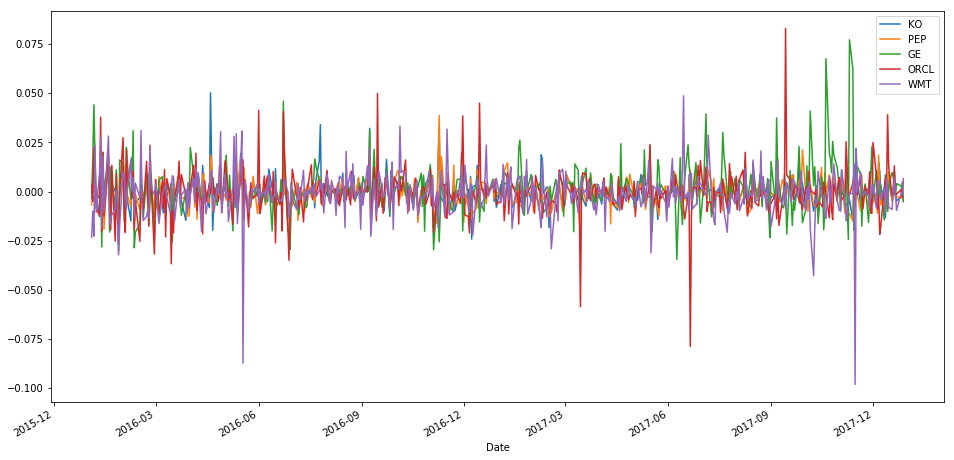

In [18]:
daily_returns.plot(figsize = (16,8))

Now we will proceed to find the volatility of the stock. It is actually possible for us to use Numpy to directly get to the standard deviation of the portfolio, but in order to better understand how we get volatility, we will take the path of first computing the co-variance of each asset, getting the variance by using a formula, and then taking the square root to get to the standard deviation. 

In this project, we will be looking for the annual volatility of the portfolio, so we will have to convert all of our calculations to an annual basis.

Lastly, note that we will be assigning equal weights for each asset in the portfolio for simplicity.

In [7]:
# Get the daily covariance (relationships) of each asset 
covariance_matrix_daily = daily_returns.cov()

# Get the annual covariance
covariance_matrix_annual = covariance_matrix_daily * 252 # number of trading days in the US for a year 

# Assign equal weights to all assets in the portfolio 
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

We can see what the covariance matrix looks like by printing out both the daily and annual versions.

In [8]:
# Print out daily covariance matrix
covariance_matrix_daily.head()

,KO,PEP,GE,ORCL,WMT
KO,0.000057,0.000041,0.000019,0.000018,0.000019
PEP,0.000041,0.000055,0.000016,0.000019,0.000025
GE,0.000019,0.000016,0.000142,0.000032,0.000017
ORCL,0.000018,0.000019,0.000032,0.000135,0.000016
WMT,0.000019,0.000025,0.000017,0.000016,0.000133


In [9]:
# Print out annual covariance matrix 
covariance_matrix_annual.head()

,KO,PEP,GE,ORCL,WMT
KO,0.014290,0.010303,0.004740,0.004575,0.004764
PEP,0.010303,0.013827,0.004107,0.004674,0.006266
GE,0.004740,0.004107,0.035810,0.008178,0.004323
ORCL,0.004575,0.004674,0.008178,0.034026,0.003993
WMT,0.004764,0.006266,0.004323,0.003993,0.033551


Now we can find the variance of the portfolio by performing a dot product calculation on the annual covariance with the weights of each asset. 

A dot product simply means that all values within the weights array are multiplied with the corresponding values within the covariance dataframe, and the results are added up together.

In [10]:
portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix_annual, weights))

# Print out portfolio variance
print(portfolio_variance)

0.009734081268279626


Now we can simply find the standard deviation by taking the square root of our portfolio's variance.

In [11]:
portfolio_volatility = np.sqrt(portfolio_variance)

print(portfolio_volatility)

0.0986614477305073


The portfolio volatility is the risk that we are taking if we are investing in these 5 assets with equally assigned weights. We can convert both the variance and the volatility of the portfolio into a percentage value simply by multiplying them with 100, and print them out in a form that is easy for investors to understand.

In [19]:
percent_variance = portfolio_variance * 100
percent_volatility = portfolio_volatility * 100

print('Variance of Portfolio is %.2f, Portfolio Risk is %.2f' % (percent_variance, percent_volatility))

Variance of Portfolio is 0.97, Portfolio Risk is 9.87


©Regio Abundan. May 30th, 2018.